<a href="https://colab.research.google.com/github/majorquev/DBDC_202103_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase5/01_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl

In [3]:
#install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
library(dplyr)
library(nycflights13)


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

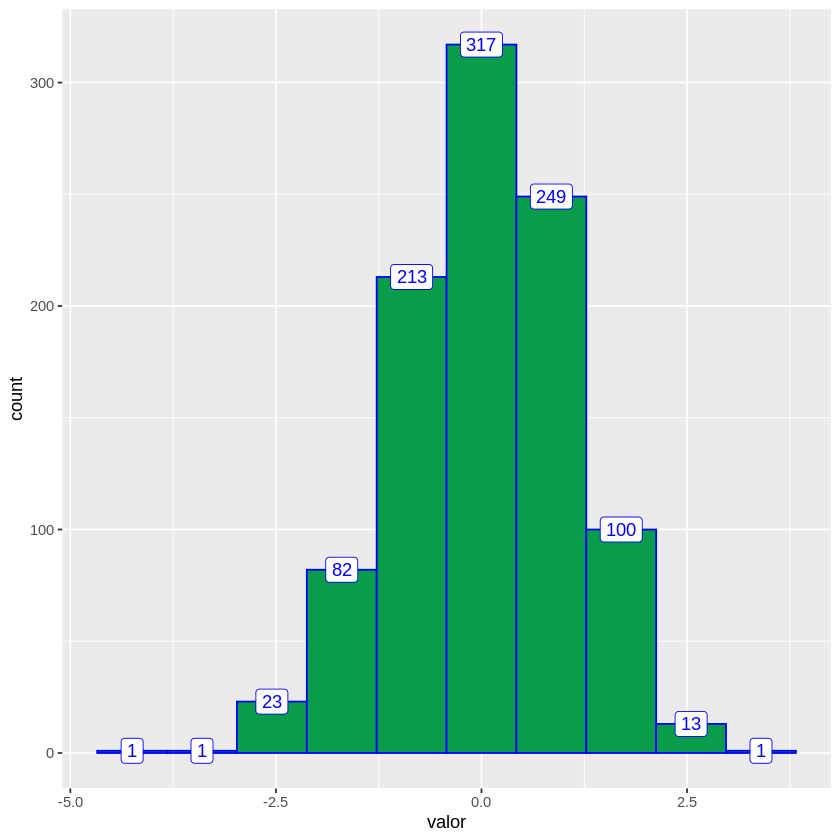

In [20]:
# Histograma de frecuencias absolutas
set.seed(15)
data <- data.frame(valor = rnorm(1000))

data %>%
  ggplot() +
  aes(x = valor, y = ..count..) +
  geom_histogram(
    bins = 10,
    fill = "#099c4b",
    color = "blue"
  ) +
  stat_bin(
    bins = 10,# permite generar cortes en la variable del eje x
    geom = 'label', # Tipo de geometría a indicar en la etiqueta (puede ser "text", "label", "point", o cualquier geometría disponible),
    mapping = aes(label = ..count..), # mapeo estético que queremos visualizar en cada bin. En esre caso es el conteo dentro cada bin.
    color = "blue",
    position = position_stack(vjust = 1)
  )





2.- Misma Visualización pero con histograma de frecuencias relativas.

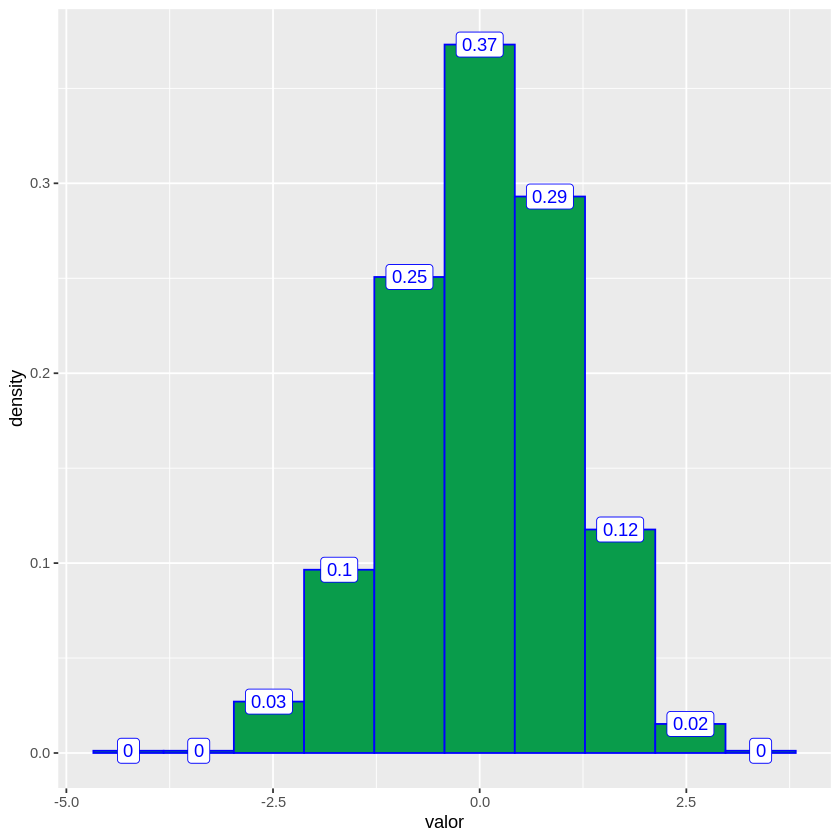

In [24]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = ..density.. en el maepo estético del histograma
data %>%
  ggplot() +
  aes(x = valor, y = ..density..) +
  geom_histogram(
    bins = 10,
    fill = "#099c4b",
    color = "blue"
  ) +
  stat_bin(
    bins = 10,# permite generar cortes en la variable del eje x
    geom = 'label', # Tipo de geometría a indicar en la etiqueta (puede ser "text", "label", "point", o cualquier geometría disponible),
    mapping = aes(label = round(..density..,2) ), # mapeo estético que queremos visualizar en cada bin. En esre caso es el conteo dentro cada bin.
    color = "blue",
    position = position_stack(vjust = 1)
  )



In [23]:
round(3.98719871891,2)

[1] 3.99

## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día. 
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



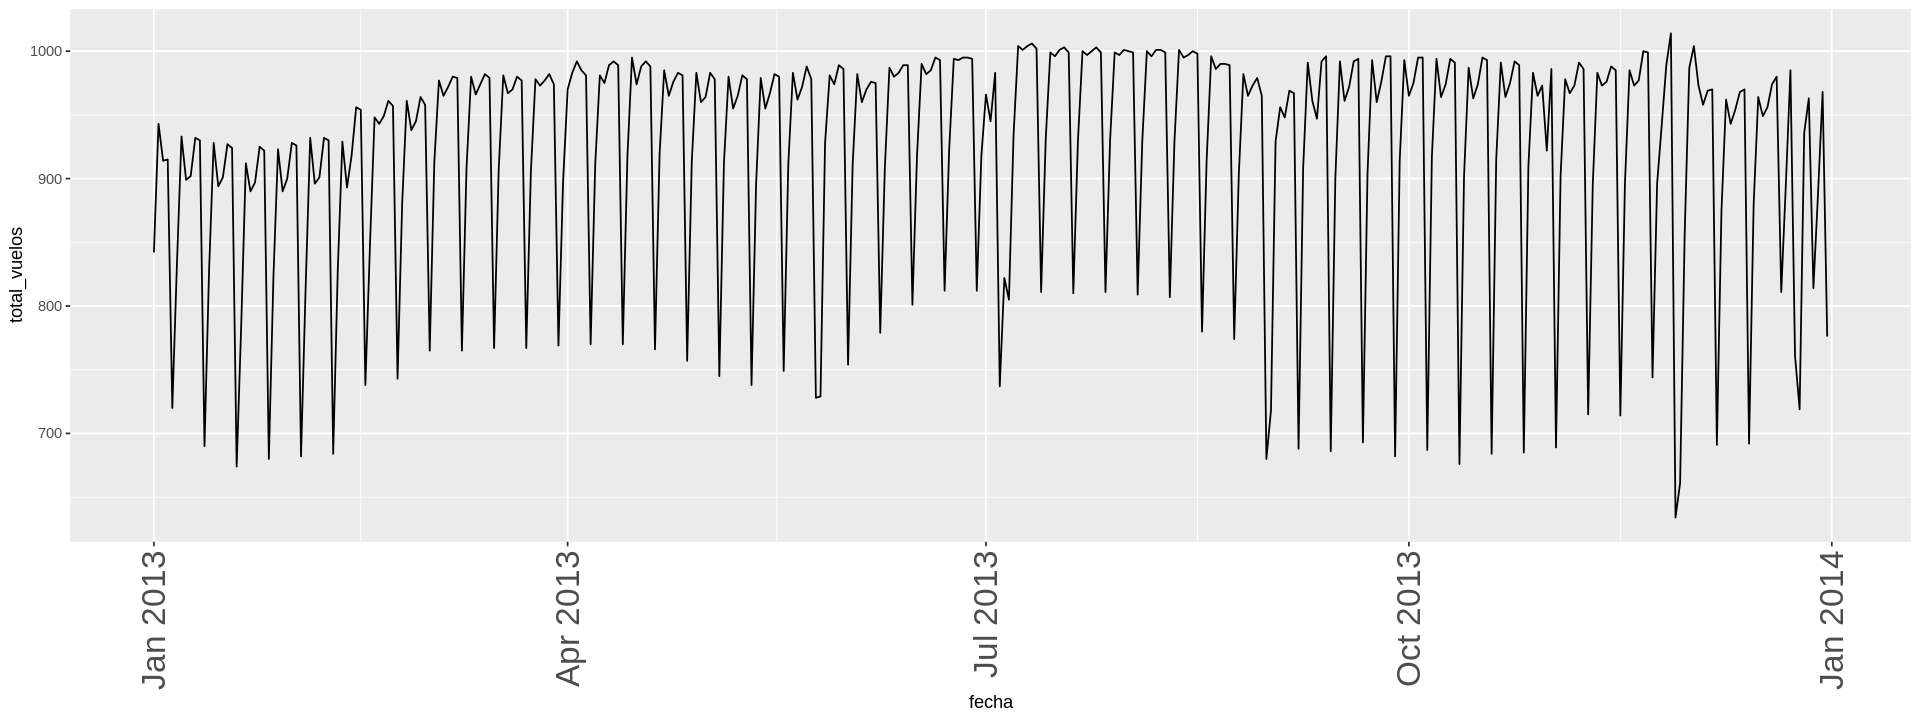

In [33]:
options(repr.plot.width=16, repr.plot.height=6)
# Orientación etiquetas ejes ----------------------------------------------
data(flights)

# A modo de ejemplo podemos visulizar el total de vuelos por día .

# Una opción para contar el total de vuelos por día es usar la  función count().
#flights %>%
#  count(year,month,day) 

# La otra opción es agrupar y utilizar la función n().
flights %>%
  group_by(year,month,day) %>%
  summarise(total_vuelos = n()) %>%
  mutate(fecha = as.Date(paste(year,
                                ifelse(nchar(month) == 1, paste0("0",month),month),
                                day,
                                sep = "-"                       
                              ),
                         format = "%Y-%m-%e"
                        )
        ) %>% 
  ggplot() +
  aes(x = fecha, y = total_vuelos) +
  geom_line() +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size = 20)
  )




# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

Para ello, como ejercicio, buscaremos replicar el siguiente gráfico que contiene para cada aeropuerto de origen, los 4 aeropuertos de destino con mayor cantidad de vuelos.

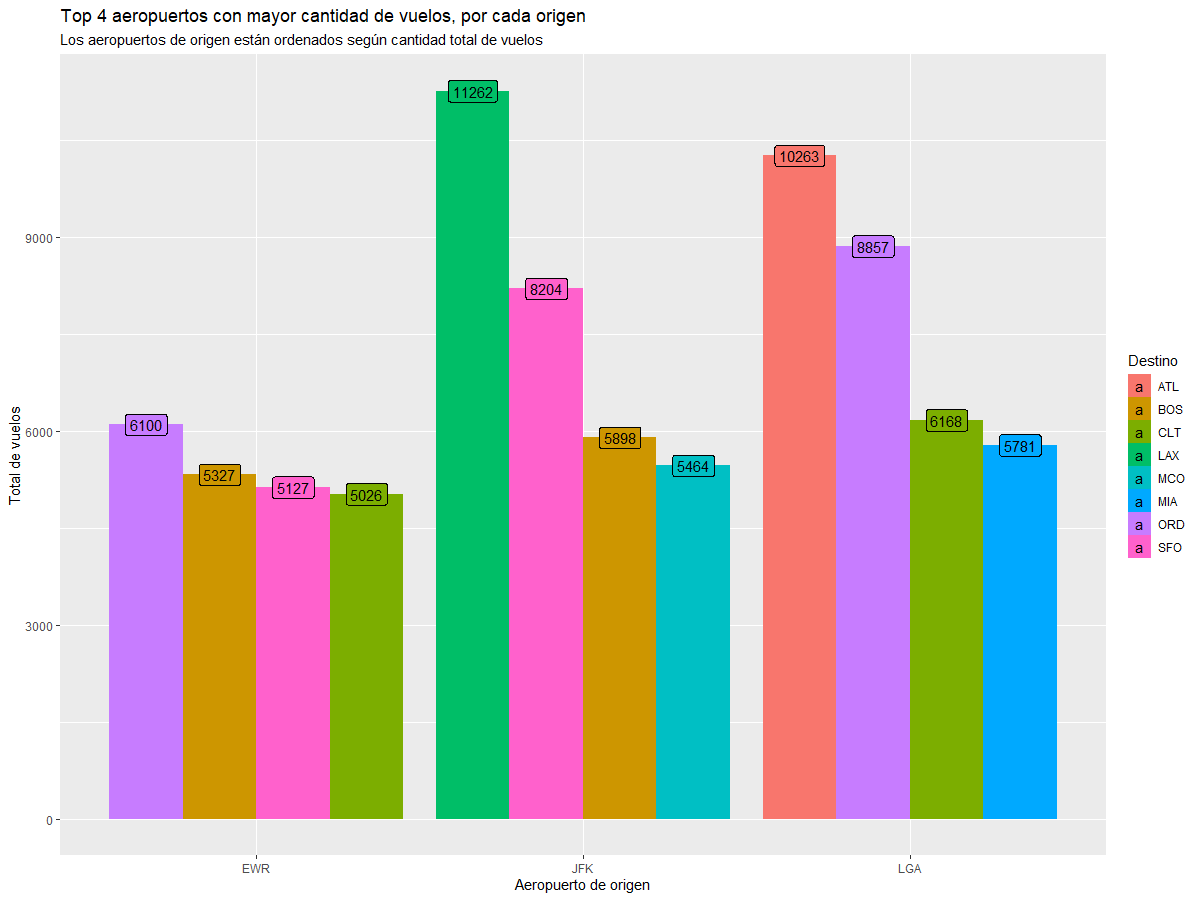


In [34]:
data(flights)

`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



origin,dest,total_vuelos
<chr>,<chr>,<int>
EWR,BOS,5327
EWR,CLT,5026
EWR,ORD,6100
EWR,SFO,5127
JFK,BOS,5898
JFK,LAX,11262
JFK,MCO,5464
JFK,SFO,8204
LGA,ATL,10263


`summarise()` has grouped output by 'origin'. You can override using the `.groups` argument.



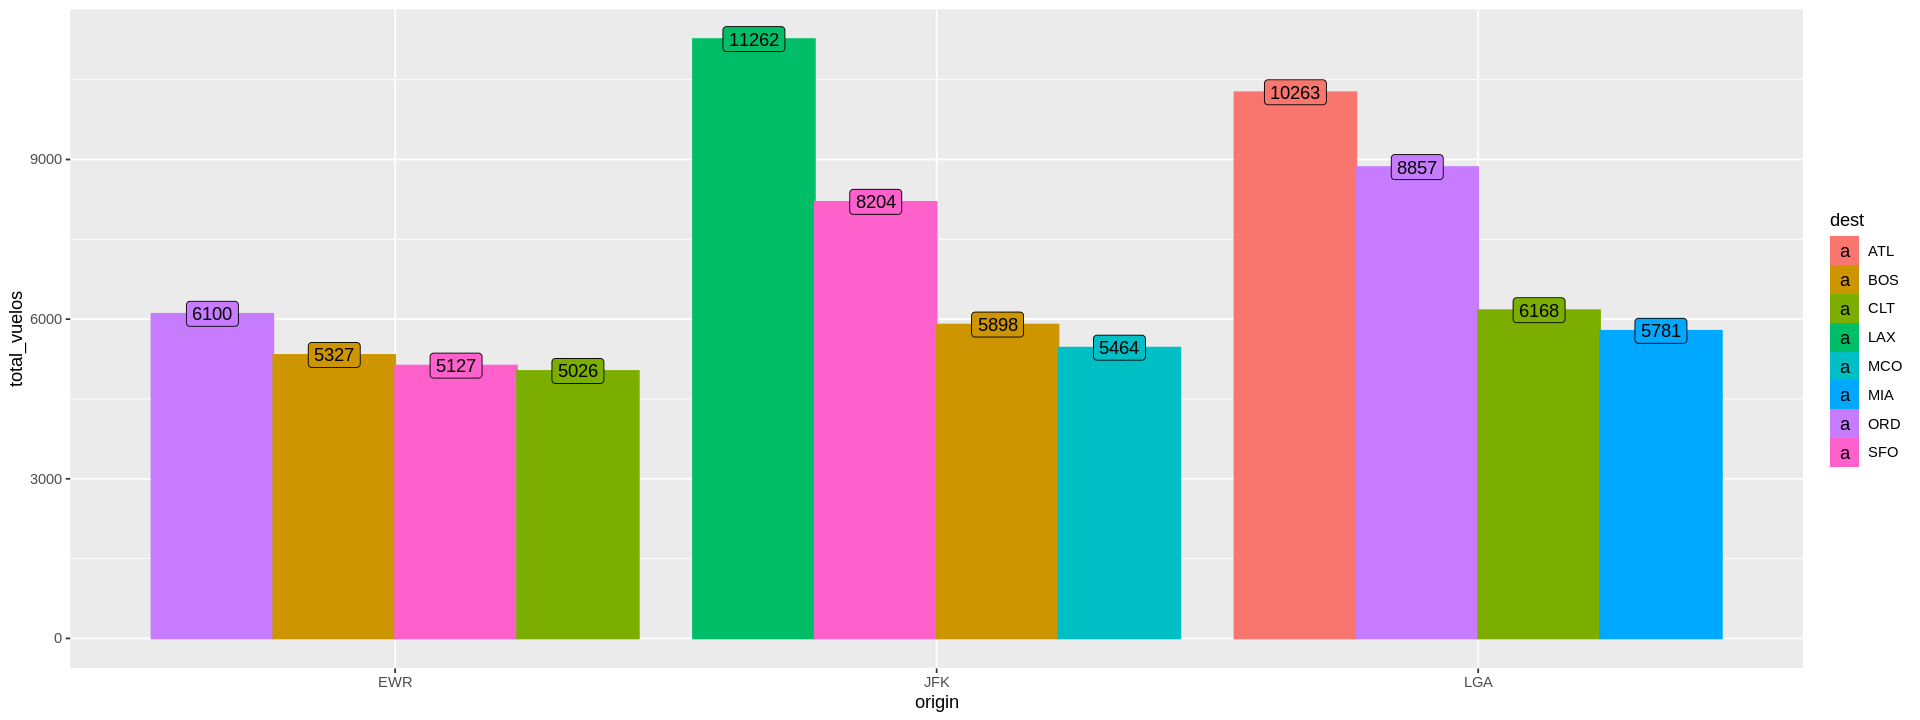

In [70]:
# Contamos con las capas geom_label y geom_text ---------------------------------
# Para ello visualizaremos los 4 aeropuertos de destino con mayor cantidad de vuelos, por cada aeropuerto de origen
# conteo por origen destino -----------------------------------------------------
# OP1
flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n())  %>%
  ungroup() %>% 
  group_by(origin) %>% 
  top_n(n = 4, wt = total_vuelos)

#OP2
flights %>%
  group_by(origin, dest) %>%
  summarise(total_vuelos = n())  %>%
  ungroup() %>% 
  group_by(origin) %>% 
  arrange(desc(total_vuelos), .by_group = T) %>%# Importante, si se quiere realizar el ordenamiento dentro de cada grupo, se debe explicitar el parámetro .by_group = TRUE
  mutate(rk = row_number()) %>%
  filter(rk <= 4) %>%
  ggplot() + 
  aes(x = origin , y = total_vuelos , color = dest, fill = dest, group = -total_vuelos ) + # Con el parámetro group podemos, en particular, controlar el orden de las categorías definidas en nuestra visualización. En nuestro caso, están definidas en el eje x (aeropuertos de destino).
  geom_bar(stat = "identity",
           position = "dodge") +
  geom_label(aes(label = total_vuelos),
             color = "black",
             position = position_dodge(width = 0.9) ) 

# Para las etiquetas considere la función labs()